In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read train set to dataframe
main_df = pd.read_csv('train_V2.csv')

In [6]:
print(main_df.shape)
main_df.head()

(4446966, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [113]:
# Number of players with percentile greater or equal to 90% 
print("# of 1st place: ", sum(main_df['winPlacePerc'] >= 0.9))

# Number of players with percentile less than or equal to 10%
print("# of last place: ", sum(main_df['winPlacePerc'] <= 0.1))

# of 1st place:  469231
# of last place:  626592


* As a starter, we will be analyzing only players with win percent >= 90 
* It will help fellow pubg players in understanding playing style of players, who has come in top 10 places


In [114]:
# Subsetting players with win percentile greater or equal to 90%
# because we want to analyze their stats to get a glimse of their playing style
players_in_top10_perc = main_df[main_df['winPlacePerc'] >= 0.9]

print(players_in_top10_perc.shape)
players_in_top10_perc.head()

(469231, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
12,ce4f6ac165705e,da24cdb91969cc,535b5dbd965a94,0,0,0.00,0,0,0,37,...,0,6639.0,0,0.00,0,0,2784.0,6,0,0.9286
14,8e244ac61b6aab,d40d0c7d3573a1,94e1c1cc443c65,0,1,122.80,1,0,2,25,...,1,1237.0,0,60.29,0,0,1666.0,5,1531,0.9000
19,71cbdbc3b263e5,7b61f74b51906c,a329ac99449ad7,0,1,65.28,0,0,1,48,...,0,0.0,0,20.85,0,0,3310.0,3,1479,0.9310
23,0b6fbdfb59c994,7a75c3e86934f6,8b0a78c005cea0,0,6,1011.00,6,2,2,2,...,0,4860.0,0,0.00,0,0,2727.0,7,1603,0.9592
24,736eda9b9c20b3,d35e80e4e64dd4,62fbe726028662,0,3,327.60,4,1,1,3,...,0,0.0,0,0.00,0,0,3503.0,4,1496,0.9231


* Let's first check the number of top players in each category: Solo, Duo or Squad

In [116]:
solo_players_in_top10_perc = players_in_top10_perc[players_in_top10_perc.matchType.isin(['solo', 'solo-fpp'])]
duo_players_in_top10_perc = players_in_top10_perc[players_in_top10_perc.matchType.isin(['duo', 'duo-fpp'])]
squad_players_in_top10_perc = players_in_top10_perc[players_in_top10_perc.matchType.isin(['squad', 'sqaud-fpp'])]

print('# of total solo players in top 10 percentile wins: ', solo_players_in_top10_perc.shape[0])
print('# of total duo players in top 10 percentile wins: ', duo_players_in_top10_perc.shape[0])
print('# of total sqaud players in top 10 percentile wins: ', squad_players_in_top10_perc.shape[0])

# of total solo players in top 10 percentile wins:  74823
# of total duo players in top 10 percentile wins:  136194
# of total sqaud players in top 10 percentile wins:  65989


* We can plot correlation map for some features we are more interested in
* It will give an idea about each feature's correlation with win percentile

In [117]:
players_in_top10_perc_subset =  players_in_top10_perc[['assists', 'boosts', 'damageDealt', 'DBNOs', 'heals', 'kills',
                                               'revives', 'rideDistance', 'walkDistance', 'weaponsAcquired',
                                               'winPlacePerc']]

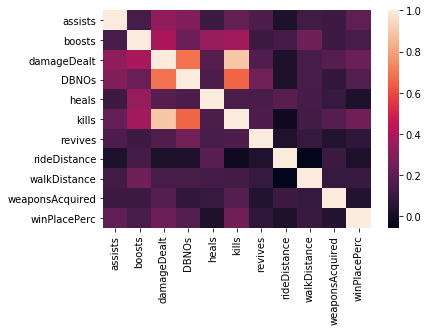

In [118]:
corr = players_in_top10_perc_subset.corr()

sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

* From the heatmap, it is visible that features: 'assists', 'kills' and 'damage dealt' seem more correlated with winPlace percentile
* So we will plot those features to better understand the stats

In [119]:
# Boosts

print("Average # of boosts used by players in top10 percentile: ", round(np.mean(players_in_top10_perc.boosts)))

Average # of boosts used by players in top10 percentile:  4


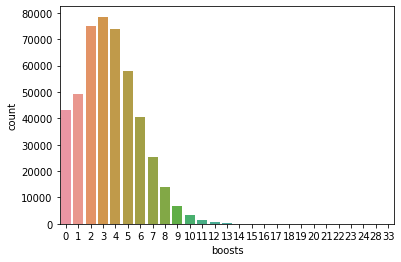

In [121]:
# Let's look at # of boosts by number of players
sns.countplot(players_in_top10_perc.boosts)

In [122]:
# Damage dealt

print("Average damage dealt: ", round(np.mean(players_in_top10_perc.damageDealt)))

Average damage dealt:  319


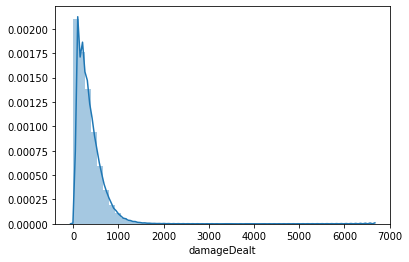

In [123]:
# distribution plot for damage dealt by each player in top 10 percentile
sns.distplot(players_in_top10_perc.damageDealt)

In [124]:
# Kills

print("Average # of kills: ", round(np.mean(players_in_top10_perc.kills)))

Average # of kills:  3


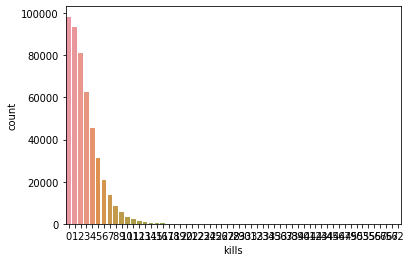

In [125]:
# count for number of kills
sns.countplot(players_in_top10_perc.kills)

* Based on above countplot, we can divide kills into different bins to better understand correlation

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


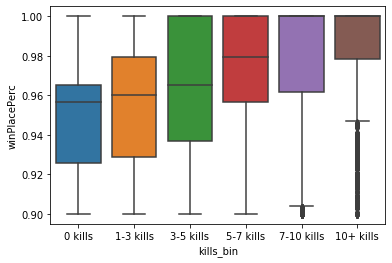

In [127]:
# Dividing kills into 6 different bins
players_in_top10_perc['kills_bin'] = pd.cut(players_in_top10_perc['kills'], [-1, 0, 3, 5, 7, 10, 20], 
                                            labels=['0 kills','1-3 kills', '3-5 kills', '5-7 kills',
                                                    '7-10 kills', '10+ kills'])

# Boxplot of winPlacePerc vs kills
sns.boxplot(x='kills_bin', y='winPlacePerc', data=players_in_top10_perc)

* This box plot gives clear explanation that players with higher kills (more than 5) have better chance of coming in top 10 percentile win place
* So if you want to come in top 10 places, kill more enemies! The higher the better!

Average walkdistance for top 10 percentile players: 2812.632024m 


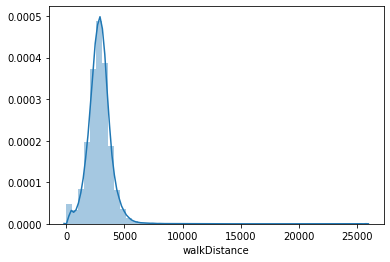

In [56]:
# WalkDistance

print("Average walkdistance for top 10 percentile players: %fm " % np.mean(players_in_top10_perc.walkDistance))

sns.distplot(players_in_top10_perc.walkDistance)

* From heatmap we saw that, walkDistance is not a bigger factor to come in top 10 places. 
* As a pubg player, I know that distance might be different for players in top10 places based on final zones
* hence, walkDistance or rideDistance won't add up much for the top 10 places

In [57]:
# weaponsAcquired

print("Average # of weapons acquired for top 10 percentile players: ", round(np.mean(players_in_top10_perc.weaponsAcquired)))

Average # of weapons acquired for top 10 percentile players:  5


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


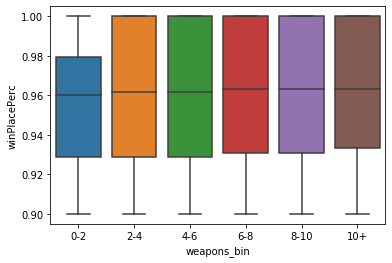

In [128]:
# binning weaponsAcquired feature
players_in_top10_perc['weapons_bin'] = pd.cut(players_in_top10_perc['weaponsAcquired'], 
                                                    [0, 2, 4, 6, 8, 10, 30], labels=['0-2','2-4', '4-6', '6-8',
                                                                                      '8-10', '10+'])
sns.boxplot(x='weapons_bin', y='winPlacePerc', data=players_in_top10_perc)

* This boxplot denotes that, how many number of weapons player used during whole game won't affect his chance of coming into top 10 places. 
* Winning players might play only with 3-4 weapons from start to end. It won't improve your chance of winning.